### Comparatif d'un neurones vs un reseaux a une couche vs un  reseaux a plusieurs couches

Creation de deux dataset de base l'un lineraire et l'autre non lineraire

In [18]:
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [9]:
X_li,y_li = make_blobs(n_samples=2000,n_features=2,centers=2,random_state=0)
y_li.reshape((y_li.shape[0],1))
X_nl,y_nl = make_circles(n_samples=2000,noise=0.1,factor=0.3,random_state=0)
y_li.reshape((y_nl.shape[0],1))
print("X_li shape :",X_li.shape,'\n y_li shape :',y_li.shape,'\n X_nl shape :',X_nl.shape,'\n y_nl shape :',y_nl.shape)

X_li shape : (2000, 2) 
 y_li shape : (2000,) 
 X_nl shape : (2000, 2) 
 y_nl shape : (2000,)


<function matplotlib.pyplot.show(close=None, block=None)>

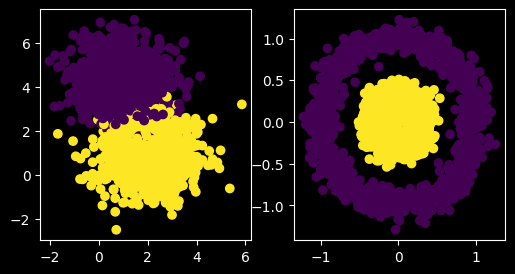

In [30]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.scatter(X_li[:,0],X_li[:,1],label = 'data set lineraire 0',c=y_li,cmap='viridis')
plt.subplot(1,2,2)
plt.scatter(X_nl[:,0],X_nl[:,1],label='data set non lineraire',c=y_nl,cmap='viridis')
plt.show